In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline
import itertools

In [2]:
# %load SpinMatrices.py
"""
Created on Wed Apr  5 15:51:46 2017

@author: hilaryhurst
"""

import numpy as np

def SpinMatrices(S):
    """
    This function takes the arguement S which must be integer, 
    then returns an array of spin matrices Sx, Sy, and Sz based on the 
    size of S.
    """
    
    m=-1*np.arange(-S,S+1,1);
    Sz = np.diag(np.diag(np.diag(m)))
    SPlusDiag=[];
    for n in m:
        SPlusDiag.append(np.sqrt(S*(S+1)-n*(n+1)))
    SPlus = np.diag(SPlusDiag[1:2*S+1],k=1)
    SMinus= SPlus.T
    
    Sx = (SPlus+SMinus)/2
    Sy = -1j*(SPlus-SMinus)/2
    
    return [Sx,Sy,Sz,SPlus,SMinus]

# Quantum Trajectories Simulation of Multilevel Driven-Dissipative system: Different Unravelings of the Master Equation

## Model and Motivation 

### General Concepts

The goal of this notebook is to use a simple model of a driven-dissipative system with multiple jump operators to understand how the quantum trajectories formalism applies to this case. In particular, multiple jump operators allows for the idea of different "unravelings" of the master equation to occur - wherein we can probe the system using differen sets of POVMs or Kraus operators. In this case, we will consider Coherent Population Trapping (CPT), i.e. population of a dark state, in a two-level system with 3-fold Zeeman degeneracy. The general master equation for a system with multiple Linblad jump operators $\hat{L}_{\mu}$ is given by 
$$\frac{\partial \hat{\rho}}{\partial t} = -\frac{i}{\hbar}\left[H_{eff},\hat{\rho}\right]' + \sum_{\mu = 1}^{M}\hat{L}_\mu\hat{\rho}\hat{L}_{\mu}^\dagger$$ with $\hat{H}_{eff} = \hat{H} - \frac{i\hbar}{2}\sum_{\mu}\hat{L}_{\mu}^\dagger\hat{L}_{\mu}$ and the $\left[~,~\right]'$ means we take the Hermitian conjugate of the non-Hermitian Hamiltonian $H_{eff}$ in the commutator. The probability for each possible jump is given by $\delta p_{\mu} = \langle\psi|\hat{L}_{\mu}^\dagger\hat{L}_{\mu}|\psi\rangle\delta t$ with the total jump probability $\delta p = \sum_{\mu}\delta p_{\mu}$. 

The MCWF simulation runs like this: 
1. Pick a random number $0<\epsilon<1$.
2. Evolve the wavefunction forward in time as $|\psi(\delta t)\rangle = e^{-i\hat{H}_{eff}\delta t/\hbar}|\psi(0)\rangle$. When $|\psi(\tau)|^2 = \langle\psi(0)|e^{\frac{i}{\hbar}(\hat{H}_{eff}^\dagger-\hat{H}_{eff})\tau}|\psi(0)\rangle <\epsilon $, then perform a jump. This is statistically equivalent to saying that when $\delta p >\epsilon \rightarrow$ jump.
3. **Choose *which* jump with another random number $0<\eta<1$. The $\mu$-th jump is taken for $\delta p_{\mu}/\delta p > \eta$**. (not totally clear on this step).
4. Renormalize, then again look at the decaying norm and jump agaion when the new WF and $\epsilon$ are at $|\psi(\tau_2)|^2 = \langle\psi(\tau)|e^{\frac{i}{\hbar}(\hat{H}_{eff}^\dagger-\hat{H}_{eff})\tau_2}|\psi(\tau)\rangle <\tilde{\epsilon}$ Repeat for times $\tau$ as long out as you want. 
5. Finally, at the end, $|\psi(t)\rangle$ needs to be renormalized at each intermediate time where a jump was not taken. 

### Specific Example: Spontaneous Emission w/ Zeeman Degeneracy

Consider an atom with ground and excited state manifolds $J_{g,e}$ with total angular momentum $F_{e,g} = 1$ and projection along some quantization axis z $m_F = 0,\pm 1$. States $|F_{e},m_{F_e}\rangle$ and $|F_{g},m_{F_g}\rangle$ are connected by electric dipole transitions with $m_{e}-m_{g} = q = 0,\pm 1$ driven by photons of polarization $\vec{e}_q$. The jump operators $\hat{L}_q$ then correspond to emission of a photon with $q = 0$ ($\pi$ transition) or $q = \pm 1$ ($\sigma_{\pm}$ transitions). The jump operators are then given by 
$$\hat{L}_q = \sqrt{\Gamma}\sum_{m_e,m_g}\langle F_{e},m_e|F_{g},m_g,q\rangle |F_g,m_g\rangle\langle F_e,m_e| = \sum_{m_e,m_g}\sqrt{\Gamma_q}~|F_g,m_g\rangle\langle F_e,m_e|$$ where $\Gamma_q = \Gamma|\langle F_e,m_e|F_g,m_g,1_q\rangle| = \Gamma C^{J_e,J_g}_{m_e,m_g,1_q}$ is the spontaneous emission rate from $|F_e,m_e\rangle \rightarrow |F_g,m_g\rangle$ by emitting a photon of polarization $q$, determined by the Clebsch-Gordon coefficents $C^{J_e,J_g}_{m_e,m_g,1_q}$.

## Unraveling 1: Quantization Along $\vec{k} = \vec{z}$

First we suppose that the atom is driven by linearly polarized light with the quantization axis parallel to the momentum axis of the incoming light, $\vec{k}~||~\vec{e}_z$ and polarization along $\vec{e}_y$. Thus, there is only $\vec{e}_{\pm 1}$ ($\sigma_{\pm}$) light, not $\vec{e}_{0}$ ($\pi$) light, because a transverse wave cannot induce transitions along its direction of propagation. The polarization momentum is related to the axes we have chosen by $\vec{e}_0 = \vec{e}_z$ and $\vec{e}_{\pm} = \mp(\vec{e}_x\pm i\vec{e}_y)/\sqrt{2}$.

The Hamiltonian for the coherent drive is given by 
$$\hat{H} = -\Delta_{-1}|g,-1\rangle\langle g,-1|-(\Delta_{-1}-\Delta_{1})|g,1\rangle\langle g,1|-\frac{\hbar\Omega}{2}\left(\hat{D}_y+\hat{D}_y^\dagger\right)$$
Where $\Delta_{1,-1}$ are the detunings between the $|e,0\rangle$ state and $|g,\pm 1\rangle$ states, which we will set to zero, and $\Omega$ is the rabi freqeuncy. The raising and lowering operators $\hat{D}_y^{(\dagger)}$ are given by $$\hat{D}^\dagger_y = \sum_{q = 0,\pm 1}\hat{D}^\dagger_q(\vec{e}_q\cdot\vec{e}_y) = -\frac{i}{\sqrt{2}}(\hat{D}^\dagger_1 + \hat{D}^\dagger_{-1})$$
$$\hat{D}_y = \sum_{q = 0,\pm 1}\hat{D}_q(\vec{e}*_q\cdot\vec{e}_y) = \frac{i}{\sqrt{2}}(\hat{D}_1 + \hat{D}_{-1})$$

We want to study the evolutioon of the population of the dark state using $m_z$ as our quantization axis, given by $$|\psi_D\rangle = \frac{|F_g,m_z=-1\rangle + |F_g,m_z=+1\rangle}{\sqrt{2}},$$ which is uncoupled from the laser due to destructive interference.

In [3]:
S = 1

In [4]:
Sx, Sy, Sz, Sp, Sm = SpinMatrices(S)#Zeeman sublevel space
taux = np.array([[0,1],[1,0]]);#Excited Manifold/Ground Manifold space
tauM = np.array([[0,1],[0,0]]);#Excited Manifold/Ground Manifold Lowering
tauP = np.array([[0,0],[1,0]]);#Excited Manifold/Ground Manifold Raising

In [5]:
def Rot(theta0,axis0):
    rot = linalg.expm(-1j*theta0*axis0);
    return rot

In [6]:
theta = -np.pi/2

In [7]:
rotM = Rot(theta,Sx);

In [8]:
#Introduce Parameters, set hbar = 1
delta1 = 0; #detuning
delta2 = 0;
Gamma=1;
Omega = 5;#units of Gamma 
dt = 0.005; #time step

In [9]:
tarray = np.arange(0,20,dt)

In [10]:
#Formulated in Terms of Spin Matrices - May be a more efficient way to scale this up.
D02=np.kron(tauM,Sz)
D12=np.kron(tauM,-1/np.sqrt(2)*Sm)#1/np.sqrt(2) from Clebsch-Gordon
Dm12=np.kron(tauM,1/np.sqrt(2)*Sp)

Jump0=np.dot(np.conj(D02).T,D02)
Jump1=np.dot(np.conj(D12).T,D12)
Jumpm1=np.dot(np.conj(Dm12).T,Dm12)

In [94]:
Dy = 1j/np.sqrt(2)*(Dm12+D12)#1/np.sqrt(2) from Polarization Vectors dot product

In [95]:
H=-Omega/2*(np.conj(Dy).T+Dy)

In [96]:
Heff=H-1j*Gamma/2*(np.dot(np.conj(D02).T,D02)+np.dot(np.conj(D12).T,D12)+np.dot(np.conj(Dm12).T,Dm12))

In [97]:
psiDark=np.zeros((1,6),dtype=np.complex).T
psiDark[0,0]=1
psiDark[2,0]=1
norm=np.linalg.norm(psiDark)#normalize
psiDark=psiDark/norm

In [98]:
#Initialize in |g,mz=-1>
psiinit=np.zeros((1,6),dtype=np.complex).T
psiinit[2,0]=1
norm=np.linalg.norm(psiinit)#normalize
psiinit=psiinit/norm

In [99]:
#|e,mz = 0> state, for comparison of excited state population
psiup=np.zeros((1,6),dtype=np.complex).T
psiup[4,0]=1
norm=np.linalg.norm(psiup)#normalize
psiup=psiup/norm

### Single Trajectory

In [150]:
epsilon = np.random.rand(1)[0];
epsilon

0.64647587919214655

In [151]:
wf=psiinit;

In [152]:
wfarray=[];
dparray=[];

In [153]:
t0=0;

In [154]:
for el in tarray:
    #Step 1: look at the decaying norm of the WF. When it is less than epsilon, jump. 
    #DO NOT reassign wf until this happens
    wftemp=np.dot(linalg.expm(-1j*Heff*(el-t0)),wf)
    norm=np.linalg.norm(wftemp)
    if norm**2<epsilon:
        epsilon=np.random.rand(1)[0];
        t0=el;
        print(epsilon)
        #Step 2: if decaying norm is less than epsilon, we jump and then renormalize. How we pick which jump to do?
        #projection onto excited state manifold for current WF
        pjump=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0+Jump1+Jumpm1,wftemp))[0,0])*dt
        #individual jump probabilities
        pjump0=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0,wftemp))[0,0])*dt
        pjump1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump1,wftemp))[0,0])*dt
        pjumpm1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jumpm1,wftemp))[0,0])*dt
        #ratio of each jump probability to the total jump probability
        pm1r=pjumpm1/pjump
        p1r=pjump1/pjump
        p0r=pjump0/pjump
        #print(pm1r,p1r,p0r) - pm1r and p1r are equal to 1/2, p0r is 0 because that transition is forbidden
        #poor man's QM jumps for equal probability options.
        eta = np.random.rand(1)[0];#generate a new random number to determine which qm jump to take
        if eta<p1r:
            wftemp=np.dot(D1,wftemp)
            norm=np.linalg.norm(wftemp)
            wftemp=wftemp/norm
            wf=wftemp
            norm=np.linalg.norm(wftemp)
        else:
            wftemp=np.dot(Dm1,wftemp)
            norm=np.linalg.norm(wftemp)
            wftemp=wftemp/norm
            wf=wftemp
            norm=np.linalg.norm(wftemp)
    wfarray.append(wftemp)
    dparray.append(norm**2)

0.809327267196
0.0504049203959


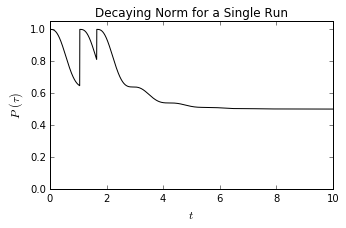

In [155]:
fig1 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax1 = fig1.add_subplot(111)
ax1.plot(list(tarray),dparray,color='k',label='Jumps')
ax1.set_xlim([0,10])
ax1.set_ylim([0,1.05])
ax1.set_xlabel(r'$t$',fontsize=12)
ax1.set_ylabel(r'$P$ $(\tau)$',fontsize=12)
ax1.set_title(r'Decaying Norm for a Single Run')
plt.show()

In [156]:
#Go back and normalize all the wafefunctions
for i in range(0,len(wfarray)):
    norm=np.linalg.norm(wfarray[i])
    wfarray[i]=wfarray[i]/norm

In [157]:
pD=np.zeros(len(wfarray));#Dark state overlap
pE=np.zeros(len(wfarray));#Excited State mz = 0 overlap
wfa=np.array(wfarray);
for i in range(0,len(wfarray)):
    pD[i]=np.absolute(np.dot(np.conj(psiDark).T,wfarray[i]))[0,0]**2
    pE[i]=np.absolute(np.dot(np.conj(psiup).T,wfarray[i]))[0,0]**2

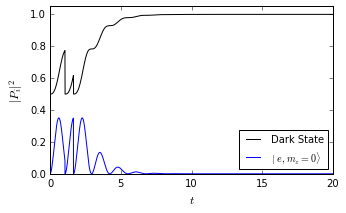

In [158]:
fig2 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax2 = fig2.add_subplot(111)
ax2.plot(list(tarray),pD,color='k',label='Dark State')
ax2.plot(list(tarray),pE,color='b',label=r'$|$ $e,m_z=0\rangle$')
ax2.set_xlim([0,20])
ax2.set_ylim([0,1.05])
ax2.set_xlabel(r'$t$',fontsize=12)
ax2.set_ylabel(r'$|P_i|^2$',fontsize=12)
ax2.legend(loc='best',title=r'',fontsize=10)
plt.show()

#### Physical Interpretation of trajectory:

In this unraveling, we see that the system gets to the dark state via a rotation. That is, the evolution under $H_{eff}$  causes the system to evolve into the dark state, whereas quantum jumps from $|e,m_z=0\rangle$ project the state onto one of the state $|g,m_z=\pm 1\rangle$, thereby decreasing the overlap with the dark state, as we can see in the above figure. Quantum jumps do not explain the evolution of the state into the dark state, rather they prevent it. 

### Many Trajectories

In [111]:
tarray = np.arange(0,20,dt)

In [112]:
nruns=100
size=(nruns,)+(len(tarray),)+psiinit.shape

In [113]:
wfarrayall = np.zeros(size,dtype=np.complex)
dparrayall = np.zeros((nruns,)+(len(tarray),))

In [114]:
for i in range(0,nruns):
    wf=psiinit;
    dp=np.linalg.norm(wf)**2
    wfarraytemp = [];
    dparraytemp = [];
    epsilon=np.random.rand(1)[0];
    t0=0;
    for el in tarray:
        #Step 1: look at the decaying norm of the WF. When it is less than epsilon, jump. 
        #DO NOT reassign wf until this happens
        wftemp=np.dot(linalg.expm(-1j*Heff*(el-t0)),wf)
        norm=np.linalg.norm(wftemp)
        if norm**2<epsilon:
            epsilon=np.random.rand(1)[0];
            t0=el;
            #print(epsilon) if you want to know how many jumps you have
            #Step 2: if decaying norm is less than epsilon, we jump and then renormalize. How we pick which jump to do?
            #projection onto excited state manifold for current WF
            pjump=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0+Jump1+Jumpm1,wftemp))[0,0])*dt
            #individual jump probabilities
            pjump0=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0,wftemp))[0,0])*dt
            pjump1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump1,wftemp))[0,0])*dt
            pjumpm1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jumpm1,wftemp))[0,0])*dt
            #ratio of each jump probability to the total jump probability
            pm1r=pjumpm1/pjump
            p1r=pjump1/pjump
            p0r=pjump0/pjump
            #print(pm1r,p1r,p0r) - pm1r and p1r are equal to 1/2, p0r is 0 because that transition is forbidden
            #poor man's QM jumps for equal probability options. Not clear how to generalize to more jump options
            eta = np.random.rand(1)[0];#generate a new random number to determine which qm jump to take
            if eta<p1r:
                wftemp=np.dot(D1,wftemp)
                norm=np.linalg.norm(wftemp)
                wftemp=wftemp/norm
                wf=wftemp
                norm=np.linalg.norm(wftemp)
            else:
                wftemp=np.dot(Dm1,wftemp)
                norm=np.linalg.norm(wftemp)
                wftemp=wftemp/norm
                wf=wftemp
                norm=np.linalg.norm(wftemp)
        wfarraytemp.append(wftemp)
        dparraytemp.append(norm**2)
    
    #Go back and normalize all the wafefunctions
    for j in range(0,len(wfarraytemp)):
        norm=np.linalg.norm(wfarraytemp[j])
        wfarraytemp[j]=wfarraytemp[j]/norm
    
    #assign to a big array 
    wfarrayall[i]=wfarraytemp
    dparrayall[i]=dparraytemp

In [115]:
pDAll=np.zeros((nruns,len(tarray)));#Dark state probability Array
wfa2=np.array(wfarrayall)

In [116]:
for j in range(0,nruns):
    for i in range(0,len(tarray)):
        pDAll[j,i]=np.absolute(np.dot(np.conj(psiDark).T,wfa2[j,i])[0,0])**2 #projection onto the dark state

In [117]:
pDAvg = np.zeros(len(tarray));
for i in range(0,len(tarray)):
    pDAvg[i]=np.mean(pDAll.T[i])

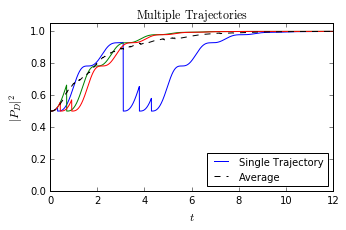

In [170]:
fig3 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax3 = fig3.add_subplot(111)
#ax3.plot(list(tarray),pDAll[0],color='y',linestyle='-',)
ax3.plot(list(tarray),pDAll[1],color='b',linestyle='-',label=r'Single Trajectory')
ax3.plot(list(tarray),pDAll[20],color='g',linestyle='-')
ax3.plot(list(tarray),pDAll[35],color='r',linestyle='-')
ax3.plot(list(tarray),pDAvg,color='k',linestyle='--',label=r'Average')
ax3.set_xlim([0,12])
ax3.set_ylim([0,1.05])
ax3.set_xlabel(r'$t$',fontsize=12)
ax3.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax3.set_title(r'$\mathrm{Multiple}$ $\mathrm{Trajectories}$')
ax3.legend(loc='lower right',title=r'',fontsize=10)
plt.show()

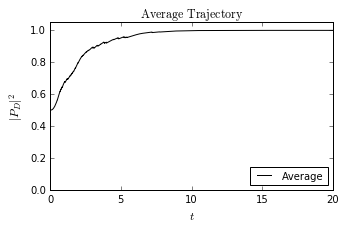

In [131]:
fig4 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax4 = fig4.add_subplot(111)
ax4.plot(list(tarray),pDAvg,color='k',label=r'Average')
ax4.set_xlim([0,20])
ax4.set_ylim([0,1.05])
ax4.set_xlabel(r'$t$',fontsize=12)
ax4.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax4.set_title(r'$\mathrm{Average}$ $\mathrm{Trajectory}$')
ax4.legend(loc='lower right',title=r'',fontsize=10)
plt.show()

## Unraveling 2: Quantization Axis along $\vec{e}_y$.

In this case, we choose our quantization axis to be along the polarization of the incoming laser, $\vec{e}_y = \vec{e}_0$. Therefore, we only drive transitions between states with the same $m_y$ number. The raising and lowering operators $\hat{D}_y^{(\dagger)}$ in the Hamiltonian are now given by

$$\hat{D}^{(\dagger)}_y = \sum_{q = 0,\pm 1}\hat{D}_q(\vec{e}_q\cdot\vec{e}_y) = \hat{D}^{(\dagger)}_0$$
With the dark state given by 
$$|\psi_{D}\rangle^{(y)} = |g,m_y = 0\rangle$$
We initialize the state again in $|g,m_z=0\rangle$, which in the $m_y$ basis is given by 
$$|g,m_z=0\rangle = -\frac{i}{\sqrt{2}}|g,m_y = 0\rangle+\frac{1}{2}(|g,m_y = -1\rangle - |g,m_y = +1\rangle)$$
where we have rotated the (coherent) Hamiltonian and the eigenstates to the new quantization basis via $\hat{H}^{(z)}\rightarrow U^{\dagger}\hat{H}^{(z)}U = \hat{H}^{(y)}$ and $|\psi\rangle^{(z)}\rightarrow U^{\dagger}|\psi\rangle^{(z)} = |\psi\rangle^{(y)}$ with $U = exp(i S_x\frac{\pi}{2})$.

In [35]:
#Initialize in |g,mz=-1>
psiinit_my=np.dot(np.conj(rotM).T,psiinit[0:3])
normmy=np.linalg.norm(psiinit_my)
psiinit_my=psiinit_my/normmy

In [36]:
psiinit_my=np.concatenate((psiinit_my,np.array([[0+0j],[0+0j],[0+0j]])))

In [37]:
Dy = D02#Sy is the polarization axis

In [38]:
H=-Omega/2*(np.conj(Dy).T+Dy)

In [39]:
Heff=H-1j*Gamma/2*(np.dot(np.conj(D02).T,D02)+np.dot(np.conj(D12).T,D12)+np.dot(np.conj(Dm12).T,Dm12))

### Single Trajectory

In [72]:
epsilon = np.random.rand(1)[0];
epsilon

0.62836968696087392

In [73]:
wf=psiinit_my;
dp=np.linalg.norm(wf)**2

In [74]:
wfarray_my=[];
dparray_my=[];

In [75]:
t0=0;

In [76]:
for el in tarray:
    #Step 1: look at the decaying norm of the WF. When it is less than epsilon, jump. 
    #DO NOT reassign wf until this happens
    wftemp=np.dot(linalg.expm(-1j*Heff*(el-t0)),wf)
    norm=np.linalg.norm(wftemp)
    if norm**2<epsilon:
        epsilon=np.random.rand(1)[0];
        t0=el;
        print(epsilon)
        #Step 2: if decaying norm is less than epsilon, we jump and then renormalize. How we pick which jump to do?
        #projection onto excited state manifold for current WF
        pjump=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0+Jump1+Jumpm1,wftemp))[0,0])*dt
        #individual jump probabilities
        pjump0=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0,wftemp))[0,0])*dt
        pjump1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump1,wftemp))[0,0])*dt
        pjumpm1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jumpm1,wftemp))[0,0])*dt
        #ratio of each jump probability to the total jump probability
        pm1r=pjumpm1/pjump
        p1r=pjump1/pjump
        p0r=pjump0/pjump
        #print(pm1r,p1r,p0r) - pm1r and p1r are equal to 1/4, p0r = 1/2. Not clear how to rigorously do this for multiple jumps
        eta = np.random.rand(1)[0];#generate a new random number to determine which qm jump to take
        if eta<p0r:
            wftemp=np.dot(D02,wftemp)
            norm=np.linalg.norm(wftemp)
            wftemp=wftemp/norm
            wf=wftemp
            norm=np.linalg.norm(wftemp)
        else:
            eta2=np.random.rand(1)[0];
            if eta2<p1r:
                wftemp=np.dot(D12,wftemp)
                norm=np.linalg.norm(wftemp)
                wftemp=wftemp/norm
                wf=wftemp
                norm=np.linalg.norm(wftemp)
            else:
                wftemp=np.dot(Dm12,wftemp)
                norm=np.linalg.norm(wftemp)
                wftemp=wftemp/norm
                wf=wftemp
                norm=np.linalg.norm(wftemp)
    wfarray_my.append(wftemp)
    dparray_my.append(norm**2)

0.37165678763
0.915000185288


In [77]:
#Go back and normalize all the wafefunctions
for i in range(0,len(wfarray_my)):
    norm_my=np.linalg.norm(wfarray_my[i])
    wfarray_my[i]=wfarray_my[i]/norm_my

In [78]:
psiDark_my=np.zeros((1,6),dtype=np.complex).T
psiDark_my[1,0]=1
norm=np.linalg.norm(psiDark_my)#normalize
psiDark_my=psiDark_my/norm

In [79]:
pD_my=np.zeros(len(wfarray_my));#Dark state overlap
wfa_my=np.array(wfarray_my);
for i in range(0,len(wfarray)):
    pD_my[i]=np.absolute(np.dot(np.conj(psiDark_my).T,wfa_my[i]))[0,0]**2

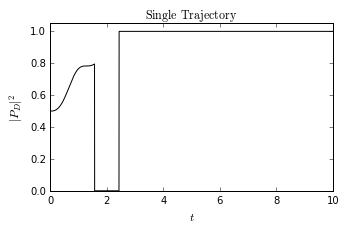

In [143]:
fig5 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax5 = fig5.add_subplot(111)
ax5.plot(list(tarray),pD_my,color='k',label='Dark State')
ax5.set_xlim([0,10])
ax5.set_ylim([0,1.05])
ax5.set_xlabel(r'$t$',fontsize=12)
ax5.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax5.set_title(r'$\mathrm{Single}$ $\mathrm{Trajectory}$')
#ax5.legend(loc='lower right',title=r'',fontsize=10)
plt.show()

#### Physical Interpretation of trajectory:

In this unraveling, we see that the system begins to rotate toward the dark state, but then a quantum jump occurs. If we see a photon of polarization $q=0$, as in the above trajectory, the system is projected onto either $|g,m_y=\pm 1$, which is orthogonal to the dark state, thus the overlap with the dark state is zero. After some time, it is pumped to the $|e,m_y=\pm 1$ state (which also has zero overlap with the dark state), but eventually we might se a photon of $q=\pm 1$ at this point, we know the system is prjected into the dark state, where it stays. Thus, this trajectory is more discontinuous, and quantum jumps are what eventually propel us to the dark state, unlike the other example above. **Note** It is also possible that the first thing we see is a photon of polarization $q = \pm 1$. In this case, we project directly onto the dark state and evolution stops.

### Many Trajectories

In [49]:
nruns=100
size=(nruns,)+(len(tarray),)+psiinit_my.shape

In [50]:
wfarrayall_my = np.zeros(size,dtype=np.complex)
dparrayall_my = np.zeros((nruns,)+(len(tarray),))

In [51]:
for i in range(0,nruns):
    wf=psiinit_my;
    wfarraytemp = [];
    dparraytemp = [];
    epsilon=np.random.rand(1)[0];
    t0=0;
    for el in tarray:
        #Step 1: look at the decaying norm of the WF. When it is less than epsilon, jump. 
        #DO NOT reassign wf until this happens
        wftemp=np.dot(linalg.expm(-1j*Heff*(el-t0)),wf)
        norm=np.linalg.norm(wftemp)
        if norm**2<epsilon:
            epsilon=np.random.rand(1)[0];
            t0=el;
            print('eps = '+str(epsilon))
            #Step 2: if decaying norm is less than epsilon, we jump and then renormalize. How we pick which jump to do?
            #projection onto excited state manifold for current WF
            pjump=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0+Jump1+Jumpm1,wftemp))[0,0])*dt
            #individual jump probabilities
            pjump0=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump0,wftemp))[0,0])*dt
            pjump1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jump1,wftemp))[0,0])*dt
            pjumpm1=np.absolute(np.dot(np.conj(wftemp).T,np.dot(Jumpm1,wftemp))[0,0])*dt
            #ratio of each jump probability to the total jump probability
            pm1r=pjumpm1/pjump
            p1r=pjump1/pjump
            p0r=pjump0/pjump
            eta = np.random.rand(1)[0];#generate a new random number to determine which qm jump to take
            print('eta = '+str(eta))
            if eta<p0r:
                wftemp=np.dot(D02,wftemp)
                norm=np.linalg.norm(wftemp)
                wftemp=wftemp/norm
                wf=wftemp
                norm=np.linalg.norm(wftemp)
            else:
                #now generate a NEW number if you rule out the highest probability jump.
                eta2=np.random.rand(1)[0];
                print('eta2 = '+str(eta2))
                if eta2<p1r:
                    wftemp=np.dot(D12,wftemp)
                    norm=np.linalg.norm(wftemp)
                    wftemp=wftemp/norm
                    wf=wftemp
                    norm=np.linalg.norm(wftemp)
                else:
                    wftemp=np.dot(Dm12,wftemp)
                    norm=np.linalg.norm(wftemp)
                    wftemp=wftemp/norm
                    wf=wftemp
                    norm=np.linalg.norm(wftemp)
        wfarraytemp.append(wftemp)
        dparraytemp.append(norm**2)
    
    #Go back and normalize all the wafefunctions
    for j in range(0,len(wfarraytemp)):
        norm=np.linalg.norm(wfarraytemp[j])
        wfarraytemp[j]=wfarraytemp[j]/norm
    
    wfarrayall_my[i]=wfarraytemp
    dparrayall_my[i]=dparraytemp

eps = 0.0931437374159
eta = 0.602438531036
eta2 = 0.98037978433
eps = 0.00666314232247
eta = 0.16522223715
eps = 0.293795426668
eta = 0.380985555589
eps = 0.648562832422
eta = 0.0768754941791
eps = 0.438532850913
eta = 0.549593235362
eta2 = 0.7260000908
eps = 0.406445518381
eta = 0.449868425653
eps = 0.375486208237
eta = 0.877316471482
eta2 = 0.586394035126
eps = 0.467787056365
eta = 0.411672307023
eps = 0.493452330878
eta = 0.75836573384
eta2 = 0.571663300052
eps = 0.932759253329
eta = 0.358312117034
eps = 0.744758867468
eta = 0.539785863942
eta2 = 0.693678840085
eps = 0.67461305719
eta = 0.206045997435
eps = 0.303534655531
eta = 0.381847741807
eps = 0.402267561335
eta = 0.782808227357
eta2 = 0.843895646442
eps = 0.505355407603
eta = 0.0276242716857
eps = 0.593351600832
eta = 0.478528202941
eps = 0.716051700968
eta = 0.945053784704
eta2 = 0.0110219168637
eps = 0.771621464482
eta = 0.331852400895
eps = 0.240140893494
eta = 0.741283782697
eta2 = 0.299504534931
eps = 0.912703074217
eta =

In [52]:
pDAll_my=np.zeros((nruns,len(tarray)));#Dark state probability Array
pEAll_my=np.zeros((nruns,len(tarray)));#|e,my=-1> probability Array
pSAll_my=np.zeros((nruns,len(tarray)));#|g,my=-1> probability Array
wfa2_my=np.array(wfarrayall_my)

In [53]:
for j in range(0,nruns):
    for i in range(0,len(tarray)):
        pDAll_my[j,i]=np.absolute(np.dot(np.conj(psiDark_my).T,wfa2_my[j,i])[0,0])**2
        pEAll_my[j,i]=np.absolute(wfa2_my[j,i,5,0])**2
        pSAll_my[j,i]=np.absolute(wfa2_my[j,i,2,0])**2

In [54]:
pDAvg_my = np.zeros(len(tarray));
for i in range(0,len(tarray)):
    pDAvg_my[i]=np.mean(pDAll_my.T[i])

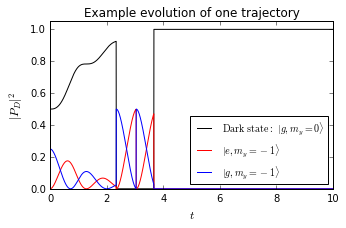

In [172]:
fig6 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax6 = fig6.add_subplot(111)
ax6.plot(list(tarray),pDAll_my[9],color='k',linestyle='-',label=r'$\mathrm{Dark}$ $\mathrm{state:}$ $|g,m_y = 0\rangle$')
ax6.plot(list(tarray),pEAll_my[9],color='r',linestyle='-',label=r'$|e,m_y = -1\rangle$')
ax6.plot(list(tarray),pSAll_my[9],color='b',linestyle='-',label=r'$|g,m_y = -1\rangle$')
ax6.set_xlim([0,10])
ax6.set_ylim([0,1.05])
ax6.set_xlabel(r'$t$',fontsize=12)
ax6.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax6.set_title('Example evolution of one trajectory')
ax6.legend(loc='lower right',title=r'',fontsize=10)
plt.show()

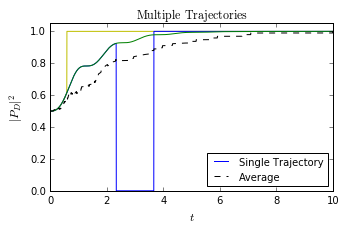

In [173]:
fig7 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax7 = fig7.add_subplot(111)
ax7.plot(list(tarray),pDAll_my[0],color='y',linestyle='-',)
ax7.plot(list(tarray),pDAll_my[9],color='b',linestyle='-',label=r'Single Trajectory')
ax7.plot(list(tarray),pDAll_my[45],color='g',linestyle='-')
#ax7.plot(list(tarray),pDAll_my[89],color='r',linestyle='-')
ax7.plot(list(tarray),pDAvg_my,color='k',linestyle='--',label=r'Average')
ax7.set_xlim([0,10])
ax7.set_ylim([0,1.05])
ax7.set_xlabel(r'$t$',fontsize=12)
ax7.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax7.set_title(r'$\mathrm{Multiple}$ $\mathrm{Trajectories}$')
ax7.legend(loc='lower right',title=r'',fontsize=10)
plt.show()

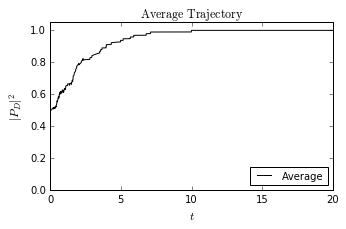

In [136]:
fig8 = plt.figure(figsize = (1.5*3.38,1.5*2))  
ax8 = fig8.add_subplot(111)
ax8.plot(list(tarray),pDAvg_my,color='k',label=r'Average')
ax8.set_xlim([0,20])
ax8.set_ylim([0,1.05])
ax8.set_xlabel(r'$t$',fontsize=12)
ax8.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax8.set_title(r'$\mathrm{Average}$ $\mathrm{Trajectory}$')
ax8.legend(loc='lower right',title=r'',fontsize=10)
plt.show()

### Comparison Between Unravellings

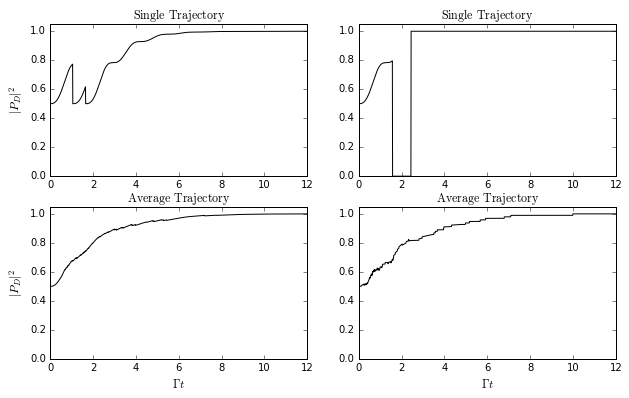

In [162]:
fig9 = plt.figure(figsize = (2*1.5*3.38,2*1.5*2))

ax9a = fig9.add_subplot(221)
ax9a.plot(list(tarray),pD,color='k',label='Dark State')
ax9a.set_xlim([0,12])
ax9a.set_ylim([0,1.05])
#ax9a.set_xlabel(r'$t$',fontsize=12)
ax9a.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax9a.set_title(r'$\mathrm{Single}$ $\mathrm{Trajectory}$')

ax9b = fig9.add_subplot(222)
ax9b.plot(list(tarray),pD_my,color='k',label='Dark State')
ax9b.set_xlim([0,12])
ax9b.set_ylim([0,1.05])
#ax9b.set_xlabel(r'$t$',fontsize=12)
#ax9b.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax9b.set_title(r'$\mathrm{Single}$ $\mathrm{Trajectory}$')

ax9a = fig9.add_subplot(223)
ax9a.plot(list(tarray),pDAvg,color='k',label=r'Average')
ax9a.set_xlim([0,12])
ax9a.set_ylim([0,1.05])
ax9a.set_xlabel(r'$\Gamma t$',fontsize=12)
ax9a.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax9a.set_title(r'$\mathrm{Average}$ $\mathrm{Trajectory}$')
#ax9a.legend(loc='lower right',title=r'',fontsize=10)

ax9d = fig9.add_subplot(224)
ax9d.plot(list(tarray),pDAvg_my,color='k',label=r'Average')
ax9d.set_xlim([0,12])
ax9d.set_ylim([0,1.05])
ax9d.set_xlabel(r'$\Gamma t$',fontsize=12)
#ax9d.set_ylabel(r'$|P_D|^2$',fontsize=12)
ax9d.set_title(r'$\mathrm{Average}$ $\mathrm{Trajectory}$')
#ax9b.legend(loc='lower right',title=r'',fontsize=10)
plt.show()

On average, both unravelings show similar behavior, however the physical interpretation of individual trajectories is very different. Additionally, we see that the second unraveling (where we choose the quantization axis to be parallel to the polarization axis) the average is much noisier because of the discontinuities in the trajectories. 